<a href="https://colab.research.google.com/github/sainihalk/Airfoil-_Self_Noise_project/blob/main/Airfoil_Sound_Pressure_Prediction_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns

In [2]:
data=pd.read_csv('/content/AirfoilSelfNoise.csv')
data.head(5)

,f,alpha,c,U_infinity,delta,SSPL
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461


In [3]:
data=data.rename(columns={'f':'Frequency','alpha': 'Angle_of_attack',
                          'c':'Chord_length','U_infinity': 'Free-stream_velocity',
                          'delta': 'Suction_side_displacement_thickness',
                          'SSPL':'Scaled_sound_pressure_level'})
data

,Frequency,Angle_of_attack,Chord_length,Free-stream_velocity,Suction_side_displacement_thickness,Scaled_sound_pressure_level
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461
...,...,...,...,...,...,...
1498,2500,15.6,0.1016,39.6,0.052849,110.264
1499,3150,15.6,0.1016,39.6,0.052849,109.254
1500,4000,15.6,0.1016,39.6,0.052849,106.604
1501,5000,15.6,0.1016,39.6,0.052849,106.224


In [4]:
# Split data into 60% training and 40% testing
train_data1, test_data1 = train_test_split(data, test_size=0.4)
print("Training data size:", len(train_data1))
print("Testing data size:", len(test_data1))

Training data size: 901
Testing data size: 602


In [5]:
train_data1.to_csv('train_data1.csv', index=False)
test_data1.to_csv('test_data1.csv', index=False)
test_data1

,Frequency,Angle_of_attack,Chord_length,Free-stream_velocity,Suction_side_displacement_thickness,Scaled_sound_pressure_level
1399,800,8.9,0.1016,39.6,0.012460,130.940
808,500,8.4,0.0508,55.5,0.005449,123.742
135,2000,3.0,0.3048,39.6,0.004957,120.532
1072,1000,9.5,0.0254,55.5,0.004328,130.332
79,16000,1.5,0.3048,71.3,0.003367,106.582
...,...,...,...,...,...,...
1134,630,12.7,0.0254,39.6,0.013025,128.867
891,630,15.4,0.0508,55.5,0.027193,129.330
42,4000,0.0,0.3048,39.6,0.003101,119.229
705,3150,12.6,0.1524,71.3,0.048316,113.334


In [6]:
train_data1

,Frequency,Angle_of_attack,Chord_length,Free-stream_velocity,Suction_side_displacement_thickness,Scaled_sound_pressure_level
602,1250,7.2,0.1524,71.3,0.007520,132.513
119,2000,3.0,0.3048,55.5,0.004525,123.069
62,5000,0.0,0.3048,31.7,0.003313,115.645
1154,1000,17.4,0.0254,71.3,0.016104,125.816
292,1600,2.0,0.2286,31.7,0.003724,125.797
...,...,...,...,...,...,...
743,2500,0.0,0.0508,55.5,0.000762,133.956
334,800,4.0,0.2286,39.6,0.004738,130.469
929,2500,15.4,0.0508,31.7,0.028985,119.945
595,6300,5.4,0.1524,31.7,0.005255,115.591


In [7]:
train_data1.isna().sum()   # finding null values

Frequency                              0
Angle_of_attack                        0
Chord_length                           0
Free-stream_velocity                   0
Suction_side_displacement_thickness    0
Scaled_sound_pressure_level            0
dtype: int64

In [8]:
train_data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 901 entries, 602 to 836
Data columns (total 6 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Frequency                            901 non-null    int64  
 1   Angle_of_attack                      901 non-null    float64
 2   Chord_length                         901 non-null    float64
 3   Free-stream_velocity                 901 non-null    float64
 4   Suction_side_displacement_thickness  901 non-null    float64
 5   Scaled_sound_pressure_level          901 non-null    float64
dtypes: float64(5), int64(1)
memory usage: 49.3 KB


In [9]:
train_data1.describe()

,Frequency,Angle_of_attack,Chord_length,Free-stream_velocity,Suction_side_displacement_thickness,Scaled_sound_pressure_level
count,901.000000,901.000000,901.000000,901.000000,901.000000,901.000000
mean,3003.362930,6.698224,0.138897,51.778357,0.011077,124.569929
std,3171.672239,5.957387,0.094707,15.780480,0.013304,6.897519
min,200.000000,0.000000,0.025400,31.700000,0.000401,103.380000
25%,800.000000,2.000000,0.050800,39.600000,0.002514,119.698000
50%,2000.000000,5.300000,0.101600,55.500000,0.004738,125.452000
75%,4000.000000,9.900000,0.228600,71.300000,0.016104,129.869000
max,20000.000000,22.200000,0.304800,71.300000,0.058411,140.987000


Heat Map

In [10]:
train_data1.corr()

,Frequency,Angle_of_attack,Chord_length,Free-stream_velocity,Suction_side_displacement_thickness,Scaled_sound_pressure_level
Frequency,1.000000,-0.242953,0.003776,0.168361,-0.222830,-0.400554
Angle_of_attack,-0.242953,1.000000,-0.529321,0.030426,0.755909,-0.159615
Chord_length,0.003776,-0.529321,1.000000,0.006453,-0.239114,-0.241679
Free-stream_velocity,0.168361,0.030426,0.006453,1.000000,-0.035845,0.132737
Suction_side_displacement_thickness,-0.222830,0.755909,-0.239114,-0.035845,1.000000,-0.325746
Scaled_sound_pressure_level,-0.400554,-0.159615,-0.241679,0.132737,-0.325746,1.000000


<Axes: title={'center': 'Heat Map'}>

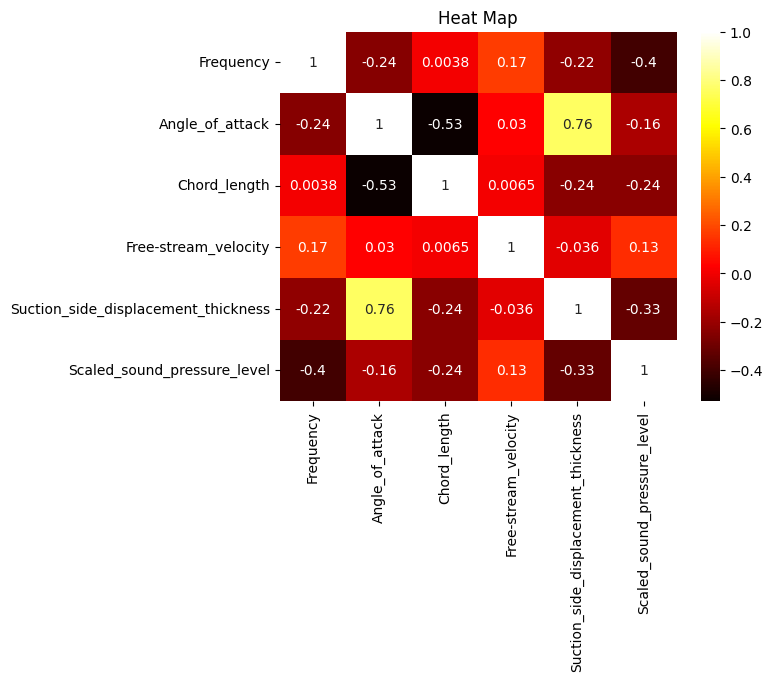

In [11]:
plt.title('Heat Map')
sns.heatmap(train_data1.corr(), cmap="hot",annot=True)

liner Regression

In [12]:
reg=linear_model.LinearRegression()

In [13]:
reg.fit(train_data1[['Frequency', 'Angle_of_attack','Chord_length','Free-stream_velocity',
              'Suction_side_displacement_thickness']],train_data1.Scaled_sound_pressure_level)

LinearRegression()

In [14]:
reg.predict([[16000,0,0.3048,55.5,0.002663]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([106.30769334])

In [15]:
testing_data1=test_data1.drop(columns=['Scaled_sound_pressure_level'])
testing_data1

,Frequency,Angle_of_attack,Chord_length,Free-stream_velocity,Suction_side_displacement_thickness
1399,800,8.9,0.1016,39.6,0.012460
808,500,8.4,0.0508,55.5,0.005449
135,2000,3.0,0.3048,39.6,0.004957
1072,1000,9.5,0.0254,55.5,0.004328
79,16000,1.5,0.3048,71.3,0.003367
...,...,...,...,...,...
1134,630,12.7,0.0254,39.6,0.013025
891,630,15.4,0.0508,55.5,0.027193
42,4000,0.0,0.3048,39.6,0.003101
705,3150,12.6,0.1524,71.3,0.048316


In [16]:
predicted=reg.predict(testing_data1)

In [17]:
testing_data1['Scaled_sound_pressure_level']=predicted
testing_data1

,Frequency,Angle_of_attack,Chord_length,Free-stream_velocity,Suction_side_displacement_thickness,Scaled_sound_pressure_level
1399,800,8.9,0.1016,39.6,0.012460,126.411681
808,500,8.4,0.0508,55.5,0.005449,131.580248
135,2000,3.0,0.3048,39.6,0.004957,121.086611
1072,1000,9.5,0.0254,55.5,0.004328,131.610560
79,16000,1.5,0.3048,71.3,0.003367,107.231264
...,...,...,...,...,...,...
1134,630,12.7,0.0254,39.6,0.013025,127.807531
891,630,15.4,0.0508,55.5,0.027193,125.168535
42,4000,0.0,0.3048,39.6,0.003101,119.981054
705,3150,12.6,0.1524,71.3,0.048316,117.536607


In [18]:
testing_data1.to_csv('final_predicted1.csv')

In [19]:
y_test1 = test_data1['Scaled_sound_pressure_level']
mse=mean_squared_error(y_test1,testing_data1['Scaled_sound_pressure_level'])
print(mse)

25.04040396642794


In [20]:
r2=r2_score(y_test1,testing_data1['Scaled_sound_pressure_level'])
print(r2)

0.4711692628756785


In [21]:
# Split data into 70% training and 30% testing
train_data2, test_data2 = train_test_split(data, test_size=0.3)
print("Training data size:", len(train_data2))
print("Testing data size:", len(test_data2))

Training data size: 1052
Testing data size: 451


In [22]:
train_data2.to_csv('train_data2.csv', index=False)
test_data2.to_csv('test_data2.csv', index=False)
test_data2

,Frequency,Angle_of_attack,Chord_length,Free-stream_velocity,Suction_side_displacement_thickness,Scaled_sound_pressure_level
1492,630,15.6,0.1016,39.6,0.052849,118.084
148,1250,3.0,0.3048,31.7,0.005295,124.838
19,1600,0.0,0.3048,55.5,0.002831,126.986
1475,315,15.6,0.1016,71.3,0.043726,133.808
822,800,8.4,0.0508,39.6,0.005662,128.435
...,...,...,...,...,...,...
819,400,8.4,0.0508,39.6,0.005662,120.015
1397,500,8.9,0.1016,39.6,0.012460,133.790
987,4000,0.0,0.0254,39.6,0.000428,135.346
233,800,0.0,0.2286,31.7,0.002724,130.725


In [23]:
train_data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1052 entries, 1258 to 187
Data columns (total 6 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Frequency                            1052 non-null   int64  
 1   Angle_of_attack                      1052 non-null   float64
 2   Chord_length                         1052 non-null   float64
 3   Free-stream_velocity                 1052 non-null   float64
 4   Suction_side_displacement_thickness  1052 non-null   float64
 5   Scaled_sound_pressure_level          1052 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 57.5 KB


In [24]:
train_data2.describe()

,Frequency,Angle_of_attack,Chord_length,Free-stream_velocity,Suction_side_displacement_thickness,Scaled_sound_pressure_level
count,1052.000000,1052.000000,1052.000000,1052.000000,1052.000000,1052.000000
mean,2911.896388,6.726901,0.136030,50.567586,0.011064,124.755524
std,3153.173939,5.889763,0.092853,15.531728,0.013224,6.884988
min,200.000000,0.000000,0.025400,31.700000,0.000401,104.130000
25%,800.000000,2.000000,0.050800,39.600000,0.002514,120.182250
50%,1600.000000,5.300000,0.101600,39.600000,0.004850,125.639000
75%,4000.000000,9.900000,0.228600,71.300000,0.015048,129.947750
max,20000.000000,22.200000,0.304800,71.300000,0.058411,140.987000


In [25]:
testing_data2=test_data2.drop(columns=['Scaled_sound_pressure_level'])
testing_data2

,Frequency,Angle_of_attack,Chord_length,Free-stream_velocity,Suction_side_displacement_thickness
1492,630,15.6,0.1016,39.6,0.052849
148,1250,3.0,0.3048,31.7,0.005295
19,1600,0.0,0.3048,55.5,0.002831
1475,315,15.6,0.1016,71.3,0.043726
822,800,8.4,0.0508,39.6,0.005662
...,...,...,...,...,...
819,400,8.4,0.0508,39.6,0.005662
1397,500,8.9,0.1016,39.6,0.012460
987,4000,0.0,0.0254,39.6,0.000428
233,800,0.0,0.2286,31.7,0.002724


In [26]:
predicted=reg.predict(testing_data2)

In [27]:
testing_data2['Scaled_sound_pressure_level']=predicted
testing_data2

,Frequency,Angle_of_attack,Chord_length,Free-stream_velocity,Suction_side_displacement_thickness,Scaled_sound_pressure_level
1492,630,15.6,0.1016,39.6,0.052849,117.450566
148,1250,3.0,0.3048,31.7,0.005295,121.184495
19,1600,0.0,0.3048,55.5,0.002831,124.724658
1475,315,15.6,0.1016,71.3,0.043726,122.586194
822,800,8.4,0.0508,39.6,0.005662,129.535745
...,...,...,...,...,...,...
819,400,8.4,0.0508,39.6,0.005662,130.048089
1397,500,8.9,0.1016,39.6,0.012460,126.795939
987,4000,0.0,0.0254,39.6,0.000428,130.430510
233,800,0.0,0.2286,31.7,0.002724,126.064666


In [28]:
testing_data2.to_csv('final_predicted2.csv')

In [29]:
y_test2 = test_data2['Scaled_sound_pressure_level']
mse=mean_squared_error(y_test2,testing_data2['Scaled_sound_pressure_level'])
print(mse)

23.074346276411838


In [30]:
r2=r2_score(y_test2,testing_data2['Scaled_sound_pressure_level'])
print(r2)

0.5190865468786647


In [31]:
# Split data into 75% training and 25% testing
train_data3, test_data3= train_test_split(data, test_size=0.25)
print("Training data size:", len(train_data3))
print("Testing data size:", len(test_data3))

Training data size: 1127
Testing data size: 376


In [32]:
train_data3.to_csv('train_data3.csv', index=False)
test_data3.to_csv('test_data3.csv', index=False)
test_data3

,Frequency,Angle_of_attack,Chord_length,Free-stream_velocity,Suction_side_displacement_thickness,Scaled_sound_pressure_level
1374,1250,6.7,0.1016,31.7,0.005929,129.256
1038,3150,4.8,0.0254,39.6,0.000907,133.436
931,4000,15.4,0.0508,31.7,0.028985,115.635
1306,630,3.3,0.1016,55.5,0.002211,126.599
751,800,0.0,0.0508,39.6,0.000792,126.508
...,...,...,...,...,...,...
679,315,9.9,0.1524,31.7,0.025278,128.809
189,1600,0.0,0.2286,71.3,0.002143,129.134
1283,1000,0.0,0.1016,31.7,0.001501,131.313
1484,2500,15.6,0.1016,71.3,0.043726,118.998


In [33]:
train_data3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1127 entries, 211 to 403
Data columns (total 6 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Frequency                            1127 non-null   int64  
 1   Angle_of_attack                      1127 non-null   float64
 2   Chord_length                         1127 non-null   float64
 3   Free-stream_velocity                 1127 non-null   float64
 4   Suction_side_displacement_thickness  1127 non-null   float64
 5   Scaled_sound_pressure_level          1127 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 61.6 KB


In [34]:
train_data3.describe()

,Frequency,Angle_of_attack,Chord_length,Free-stream_velocity,Suction_side_displacement_thickness,Scaled_sound_pressure_level
count,1127.000000,1127.000000,1127.000000,1127.000000,1127.000000,1127.000000
mean,2873.318545,6.884916,0.135835,50.851464,0.011169,124.828629
std,3101.026958,5.881444,0.093340,15.477125,0.012950,6.908555
min,200.000000,0.000000,0.025400,31.700000,0.000401,103.380000
25%,800.000000,2.000000,0.050800,39.600000,0.002663,120.112000
50%,1600.000000,5.400000,0.101600,39.600000,0.004978,125.726000
75%,4000.000000,9.900000,0.228600,71.300000,0.016104,129.967000
max,20000.000000,22.200000,0.304800,71.300000,0.058411,140.987000


In [35]:
testing_data3=test_data3.drop(columns=['Scaled_sound_pressure_level'])
testing_data3

,Frequency,Angle_of_attack,Chord_length,Free-stream_velocity,Suction_side_displacement_thickness
1374,1250,6.7,0.1016,31.7,0.005929
1038,3150,4.8,0.0254,39.6,0.000907
931,4000,15.4,0.0508,31.7,0.028985
1306,630,3.3,0.1016,55.5,0.002211
751,800,0.0,0.0508,39.6,0.000792
...,...,...,...,...,...
679,315,9.9,0.1524,31.7,0.025278
189,1600,0.0,0.2286,71.3,0.002143
1283,1000,0.0,0.1016,31.7,0.001501
1484,2500,15.6,0.1016,71.3,0.043726


In [36]:
predicted=reg.predict(testing_data3)

In [37]:
testing_data3['Scaled_sound_pressure_level']=predicted
testing_data3

,Frequency,Angle_of_attack,Chord_length,Free-stream_velocity,Suction_side_displacement_thickness,Scaled_sound_pressure_level
1374,1250,6.7,0.1016,31.7,0.005929,126.940908
1038,3150,4.8,0.0254,39.6,0.000907,129.596655
931,4000,15.4,0.0508,31.7,0.028985,118.126040
1306,630,3.3,0.1016,55.5,0.002211,132.082244
751,800,0.0,0.0508,39.6,0.000792,133.559633
...,...,...,...,...,...,...
679,315,9.9,0.1524,31.7,0.025278,121.924515
189,1600,0.0,0.2286,71.3,0.002143,129.182773
1283,1000,0.0,0.1016,31.7,0.001501,130.559541
1484,2500,15.6,0.1016,71.3,0.043726,119.787512


In [38]:
testing_data3.to_csv('final_predicted3.csv')

In [39]:
y_test3= test_data3['Scaled_sound_pressure_level']
mse=mean_squared_error(y_test3,testing_data3['Scaled_sound_pressure_level'])
print(mse)

22.897806256033267


In [40]:
r2=r2_score(y_test3,testing_data3['Scaled_sound_pressure_level'])
print(r2)

0.5146870851657641


In [41]:
# Split data into 80% training and 20% testing
train_data4, test_data4 = train_test_split(data, test_size=0.2)
print("Training data size:", len(train_data4))
print("Testing data size:", len(test_data4))

Training data size: 1202
Testing data size: 301


In [42]:
train_data4.to_csv('train_data4.csv', index=False)
test_data4.to_csv('test_data4.csv', index=False)
test_data4

,Frequency,Angle_of_attack,Chord_length,Free-stream_velocity,Suction_side_displacement_thickness,Scaled_sound_pressure_level
174,250,4.0,0.3048,39.6,0.005796,123.543
640,2500,9.9,0.1524,71.3,0.019300,119.639
1013,8000,4.8,0.0254,71.3,0.000849,131.518
201,315,0.0,0.2286,55.5,0.002293,119.540
656,2500,9.9,0.1524,55.5,0.020844,118.365
...,...,...,...,...,...,...
643,5000,9.9,0.1524,71.3,0.019300,114.569
1464,1000,12.3,0.1016,31.7,0.041876,119.777
1254,630,0.0,0.1016,55.5,0.001320,126.170
1065,4000,9.5,0.0254,71.3,0.004207,134.236


In [43]:
train_data4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1202 entries, 216 to 1231
Data columns (total 6 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Frequency                            1202 non-null   int64  
 1   Angle_of_attack                      1202 non-null   float64
 2   Chord_length                         1202 non-null   float64
 3   Free-stream_velocity                 1202 non-null   float64
 4   Suction_side_displacement_thickness  1202 non-null   float64
 5   Scaled_sound_pressure_level          1202 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 65.7 KB


In [44]:
train_data4.describe()

,Frequency,Angle_of_attack,Chord_length,Free-stream_velocity,Suction_side_displacement_thickness,Scaled_sound_pressure_level
count,1202.000000,1202.000000,1202.000000,1202.000000,1202.000000,1202.000000
mean,2864.958403,6.987521,0.134988,50.934443,0.011442,124.724166
std,3092.743003,6.040079,0.092014,15.588038,0.013260,6.885611
min,200.000000,0.000000,0.025400,31.700000,0.000401,103.380000
25%,800.000000,2.000000,0.050800,39.600000,0.002663,120.213500
50%,1600.000000,5.400000,0.101600,39.600000,0.004978,125.478000
75%,4000.000000,11.200000,0.228600,71.300000,0.016571,129.948250
max,20000.000000,22.200000,0.304800,71.300000,0.058411,140.987000


In [45]:
testing_data4=test_data4.drop(columns=['Scaled_sound_pressure_level'])
testing_data4

,Frequency,Angle_of_attack,Chord_length,Free-stream_velocity,Suction_side_displacement_thickness
174,250,4.0,0.3048,39.6,0.005796
640,2500,9.9,0.1524,71.3,0.019300
1013,8000,4.8,0.0254,71.3,0.000849
201,315,0.0,0.2286,55.5,0.002293
656,2500,9.9,0.1524,55.5,0.020844
...,...,...,...,...,...
643,5000,9.9,0.1524,71.3,0.019300
1464,1000,12.3,0.1016,31.7,0.041876
1254,630,0.0,0.1016,55.5,0.001320
1065,4000,9.5,0.0254,71.3,0.004207


In [46]:
predicted=reg.predict(testing_data4)

In [47]:
testing_data4['Scaled_sound_pressure_level']=predicted
testing_data4

,Frequency,Angle_of_attack,Chord_length,Free-stream_velocity,Suction_side_displacement_thickness,Scaled_sound_pressure_level
174,250,4.0,0.3048,39.6,0.005796,122.806709
640,2500,9.9,0.1524,71.3,0.019300,124.151340
1013,8000,4.8,0.0254,71.3,0.000849,126.634460
201,315,0.0,0.2286,55.5,0.002293,129.189097
656,2500,9.9,0.1524,55.5,0.020844,122.283839
...,...,...,...,...,...,...
643,5000,9.9,0.1524,71.3,0.019300,120.949186
1464,1000,12.3,0.1016,31.7,0.041876,119.231404
1254,630,0.0,0.1016,55.5,0.001320,133.495898
1065,4000,9.5,0.0254,71.3,0.004207,129.402972


In [48]:
testing_data4.to_csv('final_predicted4.csv')

In [49]:
y_test4 = test_data4['Scaled_sound_pressure_level']
mse=mean_squared_error(y_test4,testing_data4['Scaled_sound_pressure_level'])
print(mse)

23.90243409469346


In [50]:
r2=r2_score(y_test4,testing_data4['Scaled_sound_pressure_level'])
print(r2)

0.5026524784606823
